In [35]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from string import punctuation
import numpy as np
import multidict
import string
import cv2

In [42]:
# Pickling my saved text
with open("text.txt", "rb") as file:
    text = pickle.load(file)

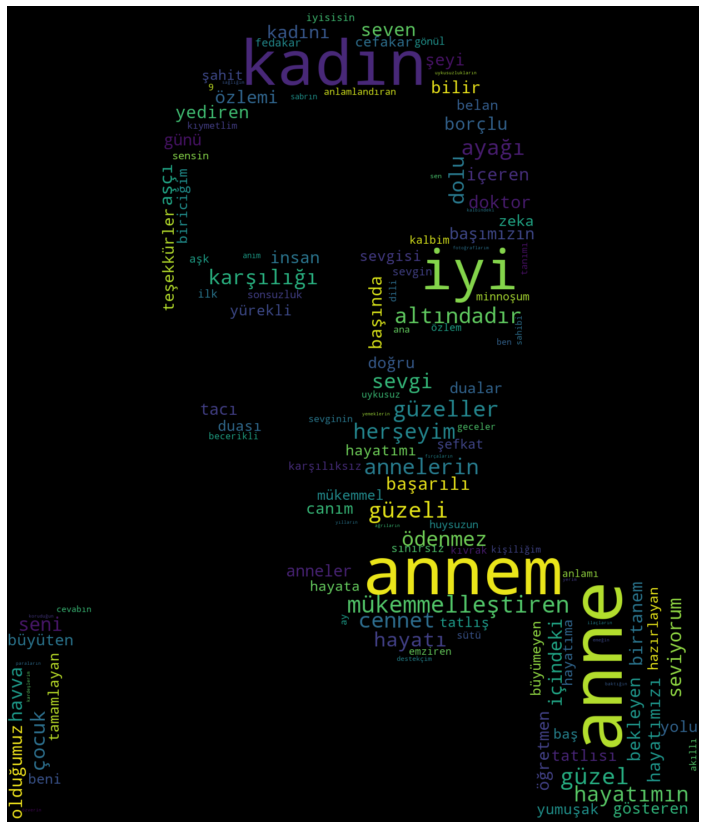

In [50]:
# creating a set of stopwords and punctuations.
stop = set(stopwords.words('turkish'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# function for cleaning text.
def organize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            letters = [item for item in i if item not in punctuation]
            word = "".join(letters)
            final_text.append(word.lower())
    return " ".join(final_text)

final_text = organize_words(text)

# function for creating a dictionary for frequency of each word.
def get_freq(final_text):
    freqDict = {}
    for word in final_text.split():
        if word not in freqDict.keys():
            freqDict[word] = 1
        else:
            freqDict[word] += 1
    return freqDict

freq_text = get_freq(final_text)

# For a detailed explanation visit following website;
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
# To obtain a more precise image, use function threshold_image. 
# For my image Otsu's binarization method worked better.

def threshold_image(image_name):
    img = cv2.imread(image_name,0)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3
    
mask = threshold_image('annem.png')

def Wordcloud_for_Mothers_day(freq_text, mask):
    wc = WordCloud(max_words=3000, mask=mask, background_color="black")
    cloud = wc.generate_from_frequencies(freq_text)
    plt.figure(figsize=(15, 15))
    plt.imshow(cloud, interpolation='bilinear')
    cloud.to_file('word_cloud_for_my_mom.png')
    plt.axis("off")
    plt.show()
    
Wordcloud_for_Mothers_day(freq_text, mask)